<a href="https://colab.research.google.com/github/Isaquintero2004/Analitica-de-Negocios/blob/main/PARCIAL_N%C2%B01_ISABELA_QUINTERO_FERN%C3%81NDEZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PARCIAL N°1**
De acuerdo con la base de datos Longitudinal Survey (Capitulo 12 – Libro Guía, Analítica de Datos – Comunicación con Datos) obtenida del libro guía, llevar a cabo la implementación de tres modelos de clasificación (Naive Bayes, Árbol de Decisión, Clusterización), para el pronóstico de si una persona o no, posee un plan de salud (Health Plan). Para la implementación del modelo, es necesario tener en cuenta las siguientes variables de entrada (Age, Mother_Edu, Father_Edu, FamilySize, Self_Esteem, Height, Weight, Income).


0. Se procede con la carga de las librerias de trabajo

In [ ]:
#Para el modelo de Naive Bayes
import numpy as np #Funciones matemáticas
import pandas as pd #Comunicación con excel
from sklearn.naive_bayes import GaussianNB

#Para el modelo de árboles de decisión: implementación y evaluación del modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

#Para el modelo de clusterización
import matplotlib.pyplot as plt #graficador
import seaborn as sns
from sklearn.cluster import KMeans #Método de clusterización - kMeans
from sklearn.metrics import confusion_matrix #análisis del modelo

#Cargar base de datos
from google.colab import drive
drive.mount('/content/drive') #cargar la base de datos desde Drive


Mounted at /content/drive


1. Se procede con la carga de la base de datos

In [ ]:
#Cargamos la base de datos
nxl="/content/drive/MyDrive/ANALÍTICA DE NEGOCIOS/4. BD1_Longitudinal Survey_L_Int.xlsx"
XDB=pd.read_excel(nxl, sheet_name=0) #usamos la hoja donde está toda la información
XDB.head(10) #Para visualizar 10 filas de la base de datos

#Seleccionamos las variables de trabajo
XDB=XDB[["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "HealthPlan", "Income"]]
XDB=XDB.dropna() #borramos las filas vacías

#Separamos variables por entrada-salida
XD=XDB[["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "Income"]] #Aquí variable de entrada
yd=XDB[["HealthPlan"]].values.ravel() #Aquí variable de referencia

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income
1,20,5.0,8.0,5,16.0,62.0,120.0,0.0
5,19,12.0,12.0,4,27.0,64.0,200.0,40000.0
6,15,12.0,12.0,3,26.0,65.0,131.0,25000.0
7,21,9.0,6.0,3,23.0,65.0,179.0,27400.0
8,16,12.0,10.0,6,26.0,66.0,145.0,52000.0
...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1000.0
12565,20,12.0,11.0,2,24.0,63.0,152.0,38000.0
12647,21,16.0,12.0,1,30.0,70.0,180.0,43600.0
12651,21,16.0,16.0,1,27.0,73.0,170.0,40000.0


## **MODELO Naive Bayes**
2. Implementamos modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
mnb=GaussianNB()
mnb.fit(XD,yd) #Esta línea tiene media, mediana

#Se obtiene la información
ct=mnb.class_count_
print("Como están separados los datos", ct)
print("El total de los datos es:", len(XD))
print("Los datos porcentualmente están divididos en:", ct/len(XD))

#Se obtiene la información de las variables por categoría
#Media
u=mnb.theta_
print("La media por categoría es: \n", u)

#Desviación estándar
std=mnb.var_  #Varianza es el valor elevado a la 2, para std hay que sacarle esa raíz
std=np.sqrt(std)  #Desviación estándar
print("La desviación estándar por categoría es: \n", std)

#Valores superiores e inferiores de los ingresos
print("El limite superior de los valores: \n", u+std)
print("El limite inferior de los valores: \n", u-std)

#Predicción
XS = pd.DataFrame([[18, 12, 12, 5, 28, 71, 180, 48000]], columns=XD.columns)
mnb.predict(XS)
print("La predicción para el plan de salud según los datos es: \n", mnb.predict(XS))

Como están separados los datos [ 853. 5110.]
El total de los datos es: 5963
Los datos porcentualmente están divididos en: [0.1430488 0.8569512]
La media por categoría es: 
 [[1.82731536e+01 1.00539273e+01 9.79835873e+00 4.98124267e+00
  2.15439625e+01 6.68968347e+01 1.46289566e+02 1.64244736e+04]
 [1.83774951e+01 1.12438356e+01 1.12348337e+01 4.64559687e+00
  2.26039139e+01 6.69878669e+01 1.45515264e+02 3.52898006e+04]]
La desviación estándar por categoría es: 
 [[2.47166531e+00 3.52070605e+00 4.15540015e+00 2.61554378e+00
  4.18019301e+00 4.16013764e+00 2.93967326e+01 2.15253706e+04]
 [2.47220497e+00 3.29361161e+00 4.03693012e+00 2.43738210e+00
  4.19558044e+00 4.18303630e+00 3.02652164e+01 3.63146146e+04]]
El limite superior de los valores: 
 [[2.07448189e+01 1.35746334e+01 1.39537589e+01 7.59678645e+00
  2.57241555e+01 7.10569723e+01 1.75686299e+02 3.79498442e+04]
 [2.08497001e+01 1.45374472e+01 1.52717638e+01 7.08297897e+00
  2.67994943e+01 7.11709032e+01 1.75780481e+02 7.16044152e

3. Matriz de confusión

In [ ]:
ydp=mnb.predict(XD) #Se obtiene la predicción de positivos y negativos

#Matriz de confusión
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd, ydp)
print("La matriz de confusión es: \n", cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1] #Enumeramos donde se encuentra cada variable

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es: \n", Ex)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es: \n", TE)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Comportamiento de quien posee un plan de salud créditos
print("La sensibilidad es: \n", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Comportamiento de quien no posee un plan de salud
print("La especificidad es: \n", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Comportamiento de identificación de positivos
print("La precisión es: \n", Pre)

#Tasa de precisión negativa
pren=VN/(VN+FN) #Comportamiento de identificación de negativos
print("La precisión negativa es: \n", pren)

La matriz de confusión es: 
 [[ 113  740]
 [ 265 4845]]
La exactitud es: 
 0.8314606741573034
La tasa de error es: 
 0.16853932584269662
La sensibilidad es: 
 0.9481409001956947
La especificidad es: 
 0.1324736225087925
La precisión es: 
 0.8675022381378693
La precisión negativa es: 
 0.29894179894179895


## **Modelo árboles de decisión**
2. Implementamos modelo de árboles de decisión

In [ ]:
#Caracterización de la base de datos
#Total de personas
total_personas = len(XDB)
print("Total de personas:", total_personas)

#Número de con plan de salud (HealthPlan = 1)
inscritos = XDB['HealthPlan'].sum()
print("Número de personas con plan de salud:", inscritos)

#Número de personas sin plan de salud (HealthPlan = 0)
no_inscritos = total_personas - inscritos
print("Número de personas sin plan de salud:", no_inscritos)

#Se llama al árbol
mar=DecisionTreeClassifier(criterion="gini", max_depth=4)
mar.fit(XD, yd)

#Se procede con el despliegue del árbol
from sklearn.tree import export_graphviz #exportar archivo
from pydotplus import graph_from_dot_data #Crear el gráfico

vs=["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "Income"] #Etiquetar el árbol (nombrarlo)

#Como quiero que me exporte el archivo
dot_data=export_graphviz(mar, feature_names=vs) #Exportarlo con los nombres
graph=graph_from_dot_data(dot_data) #Crear el gráfico
graph.write_png("ArbolHealthPlan.png")

Total de personas: 5963
Número de personas con plan de salud: 5110.0
Número de personas sin plan de salud: 853.0


True

3. Desempeño del modelo

In [ ]:
#Matriz de confusión
ydp=mar.predict(XD)
cm=confusion_matrix(yd, ydp)
print(cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es:", Ex)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Como se comportó el modelo con los positivos (con plan de salud)
print("La sensibilidad es:", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Como se comportó el modelo con los negativos (sin título plan de salud)
print("La especificidad es:", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Cual es el acierto clasificando los positivos
print("La precisión es:", Pre)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es:", TE)

#Tasa de precisión negativa
PredNeg=VN/(VN+FN) #Como funciona obteniendo los negativos
print("La precisión negativa es:", PredNeg)

[[   3  850]
 [   0 5110]]
La exactitud es: 0.8574543015260775
La sensibilidad es: 1.0
La especificidad es: 0.0035169988276670576
La precisión es: 0.8573825503355704
La tasa de error es: 0.1425456984739225
La precisión negativa es: 1.0


4. Se realiza el pronóstico

In [ ]:
#Predicción
XS = pd.DataFrame([[18,12,12,5,28,71,180,48000]], columns=XD.columns)
mnb.predict(XS)
print("La predicción para el plan de salud según los datos es: \n", mnb.predict(XS))

La predicción para el plan de salud según los datos es: 
 [1.]


## **Modelo de clusterización**
2. Identificación de la relación de las variables

In [ ]:
#Construir los gráficos de correlación
sns.pairplot(XDB,hue='HealthPlan', size=4,vars=["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "Income"]) #HealthPlan es la variable que vamos a explicar, se pone en "hue"

#Construir el heatmap
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

#Caracterización de la base de datos
#Total de personas
total_personas = len(XDB)
print("Total de personas:", total_personas)

#Número de personas con plan de salud (HealthPlan = 1)
salud = XDB["HealthPlan"].sum()
print("Número de personas con plan de salud :", salud)

#Número de personas sin plan de salud (HealthPlan = 0)
no_salud = total_personas - salud
print("Número de personas sin plan de salud:", no_salud)

3. Implementación del modelo de clusterización KMeans

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income
0,18.352564,11.695869,11.824074,4.502137,23.308405,68.292023,152.443732,49125.363248
1,18.383361,10.591343,10.383924,4.854413,21.549185,65.676785,139.277122,4246.270377
2,18.632479,13.256410,13.752137,4.324786,24.897436,69.692308,160.435897,216200.000000
3,18.340949,10.703866,10.568541,4.750439,22.212214,66.659051,144.007030,25652.303603
4,18.348837,12.547804,13.000000,4.426357,24.170543,69.198966,155.121447,88203.589147


Los cluster a los que pertenece una persona son: [1 0 3 ... 0 0 3]


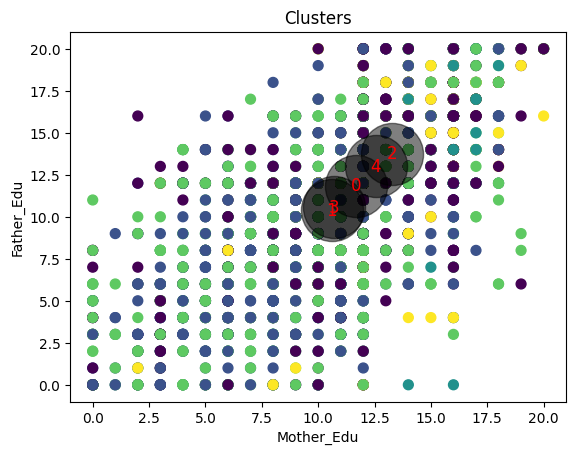

In [ ]:
#MODELO CON MOTHER_EDU Y FATHER_EDU
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Se le ponen 5 clusters, para poder describirlos muy bajo, bajo, medio, alto y mul alto- con los que se puede describir una variable
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(XD,yd)

#Para buscar los graficos creados
mkm.cluster_centers_ #Busca los centros del cluster

#Gráficos creados para los clusters
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "Income"]
display(dfc)

#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(XD) #A cada cluster pertenece cada persona
print("Los cluster a los que pertenece una persona son:", ydc) #el número que aparece es al cluster al que pertenece

#Se procede con la gráfica de los cluster
#Tomamos las dos variables con mayor correlación (ingresos y egresos)
centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(XD.iloc[:,1],XD.iloc[:,2],c=ydc,s=50, cmap="viridis") #cmap es el color del mapay el s=50 es el tamaño de las bolitas
plt.scatter(centroids[:,1], centroids[:,2], c="black", s=2000, alpha=0.5) #ubica los clusters dentro del gráfico
for i, c in enumerate(centroids):
    plt.text(c[1], c[2], str(i), fontsize=12, color='red', ha='center', va='center') #Se le ponen los números de cluster a los centroids
plt.xlabel("Mother_Edu")
plt.ylabel("Father_Edu")
plt.title("Clusters")
plt.show()

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,Income
0,18.352564,11.695869,11.824074,4.502137,23.308405,68.292023,152.443732,49125.363248
1,18.383361,10.591343,10.383924,4.854413,21.549185,65.676785,139.277122,4246.270377
2,18.632479,13.256410,13.752137,4.324786,24.897436,69.692308,160.435897,216200.000000
3,18.340949,10.703866,10.568541,4.750439,22.212214,66.659051,144.007030,25652.303603
4,18.348837,12.547804,13.000000,4.426357,24.170543,69.198966,155.121447,88203.589147


Los cluster a los que pertenece una persona son: [1 0 3 ... 0 0 3]


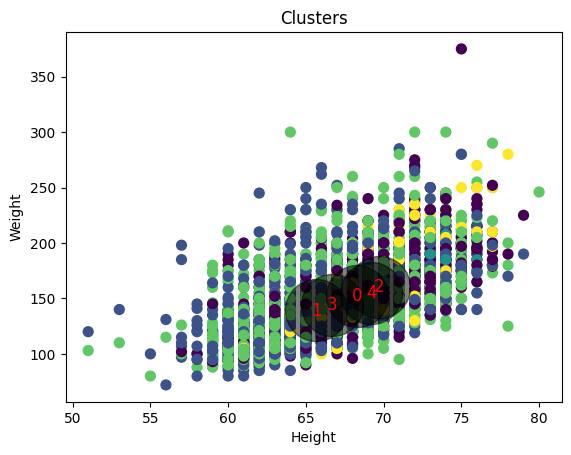

In [ ]:
#MODELO CON WEIGHT Y HEIGHT
np.random.seed(42) #Se generan los mismos numeros aleatorios
NC=5 #Se le ponen 5 clusters, para poder describirlos muy bajo, bajo, medio, alto y mul alto- con los que se puede describir una variable
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(XD,yd)

#Para buscar los graficos creados
mkm.cluster_centers_ #Busca los centros del cluster

#Gráficos creados para los clusters
dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=["Age","Mother_Edu","Father_Edu","FamilySize","Self_Esteem", "Height", "Weight", "Income"]
display(dfc)

#A que sucursal o cluster pertenece una persona
ydc=mkm.predict(XD) #A cada cluster pertenece cada persona
print("Los cluster a los que pertenece una persona son:", ydc) #el número que aparece es al cluster al que pertenece

#Se procede con la gráfica de los cluster
#Tomamos las dos variables con mayor correlación (ingresos y egresos)
centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(XD.iloc[:,5],XD.iloc[:,6],c=ydc,s=50, cmap="viridis") #cmap es el color del mapay el s=50 es el tamaño de las bolitas
plt.scatter(centroids[:,5], centroids[:,6], c="black", s=2000, alpha=0.5) #ubica los clusters dentro del gráfico
for i, c in enumerate(centroids):
    plt.text(c[5], c[6], str(i), fontsize=12, color='red', ha='center', va='center') #Se le ponen los números de cluster a los centroids
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusters")
plt.show()

4. Se determinan los porcentajes de quienes tienen o no planes de salud

In [ ]:
#Contabilizar la cantidad de personas que tiene cada cluster
ND=np.bincount(ydc)

#Creamos la columna cluster para guardar el ydc
XDB["cluster"]=ydc #Adiciona una columna para indiciar a que cluster pertenece cada persona
display(XDB)

#Encontrar la cantidad de aprobados o no en cada cluster y su porcentaje
#Numero de personas aprobadas por cluster
NApr=XDB.groupby("cluster").agg({"HealthPlan":lambda x: (x==1).sum()})

#Porcentajes aprobados
NAprp=np.array(NApr)/ND[:,None]

#Numero de personas no aprobadas por cluster
Nneg=XDB.groupby("cluster").agg({"HealthPlan":lambda x: (x==0).sum()})

#Porcentaje negados
Nnegp=np.array(Nneg)/ND[:,None]

#Organizarlo en una tabla todo junto
df2=pd.DataFrame(np.column_stack((ND, NApr, Nneg, NAprp, Nnegp)))
df2.columns=["ND", "NApr", "Nneg", "%Apr", "%Neg"] #ND es el número total de personas por cluster
display(df2)

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,HealthPlan,Income,cluster
1,20,5.0,8.0,5,16.0,62.0,120.0,1.0,0.0,1
5,19,12.0,12.0,4,27.0,64.0,200.0,1.0,40000.0,0
6,15,12.0,12.0,3,26.0,65.0,131.0,1.0,25000.0,3
7,21,9.0,6.0,3,23.0,65.0,179.0,1.0,27400.0,3
8,16,12.0,10.0,6,26.0,66.0,145.0,1.0,52000.0,0
...,...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1.0,1000.0,1
12565,20,12.0,11.0,2,24.0,63.0,152.0,1.0,38000.0,0
12647,21,16.0,12.0,1,30.0,70.0,180.0,1.0,43600.0,0
12651,21,16.0,16.0,1,27.0,73.0,170.0,1.0,40000.0,0


,ND,NApr,Nneg,%Apr,%Neg
0,1404.0,1353.0,51.0,0.963675,0.036325
1,1779.0,1320.0,459.0,0.741990,0.258010
2,117.0,112.0,5.0,0.957265,0.042735
3,2276.0,1947.0,329.0,0.855448,0.144552
4,387.0,378.0,9.0,0.976744,0.023256


5. Pronóstico para la base de datos

In [ ]:
#Vector prnóstico, de igual longitud que ydc
ydp=np.zeros((len(ydc),1))

#Cluster al que pertenece cada persona
for k in range(len(ydp)):
  print("La persona:", k) #persona de la base de datos
  print("pertenece al cluster", ydc[k]) #a cual pertenece
  ncl=ydc[k] #almacenar el número de cluster
  print("El porcentaje de negativos es:", Nnegp[ncl]) #Busca porcentaje de quienes no tienen plan
  print("El porcentaje de positivos es:", NAprp[ncl]) #Busca porcentaje de quienes tienen plan
#Aprobar o negar
  if NAprp[ncl]>Nnegp[ncl]:
    print("Si posee plan de salud")
    ydp[k]=1
  else:
    print("No posee plan de salud")
    ydp[k]=0

#Guardar pronóstico en la tabla inicial
XDB["Pronóstico"]=ydp #Adiciono una columna a la tabla original
display(XDB)

#Crear un excel
XDB.to_excel("InformeHealthPlan.xlsx")


Se han truncado las últimas 5000 líneas del flujo de salida.
La persona: 4963
pertenece al cluster 3
El porcentaje de negativos es: [0.14455185]
El porcentaje de positivos es: [0.85544815]
Si posee plan de salud
La persona: 4964
pertenece al cluster 0
El porcentaje de negativos es: [0.03632479]
El porcentaje de positivos es: [0.96367521]
Si posee plan de salud
La persona: 4965
pertenece al cluster 1
El porcentaje de negativos es: [0.25801012]
El porcentaje de positivos es: [0.74198988]
Si posee plan de salud
La persona: 4966
pertenece al cluster 1
El porcentaje de negativos es: [0.25801012]
El porcentaje de positivos es: [0.74198988]
Si posee plan de salud
La persona: 4967
pertenece al cluster 0
El porcentaje de negativos es: [0.03632479]
El porcentaje de positivos es: [0.96367521]
Si posee plan de salud
La persona: 4968
pertenece al cluster 3
El porcentaje de negativos es: [0.14455185]
El porcentaje de positivos es: [0.85544815]
Si posee plan de salud
La persona: 4969
pertenece al clu

,Age,Mother_Edu,Father_Edu,FamilySize,Self_Esteem,Height,Weight,HealthPlan,Income,cluster,Pronóstico
1,20,5.0,8.0,5,16.0,62.0,120.0,1.0,0.0,1,1.0
5,19,12.0,12.0,4,27.0,64.0,200.0,1.0,40000.0,0,1.0
6,15,12.0,12.0,3,26.0,65.0,131.0,1.0,25000.0,3,1.0
7,21,9.0,6.0,3,23.0,65.0,179.0,1.0,27400.0,3,1.0
8,16,12.0,10.0,6,26.0,66.0,145.0,1.0,52000.0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12557,20,12.0,12.0,5,20.0,60.0,110.0,1.0,1000.0,1,1.0
12565,20,12.0,11.0,2,24.0,63.0,152.0,1.0,38000.0,0,1.0
12647,21,16.0,12.0,1,30.0,70.0,180.0,1.0,43600.0,0,1.0
12651,21,16.0,16.0,1,27.0,73.0,170.0,1.0,40000.0,0,1.0


6. Evaluamos una persona nueva

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


La persona pertenece al cluster: [0]
El porcentaje de Apr es: [[0.96367521]]
El porcentaje de Neg es: [[0.03632479]]


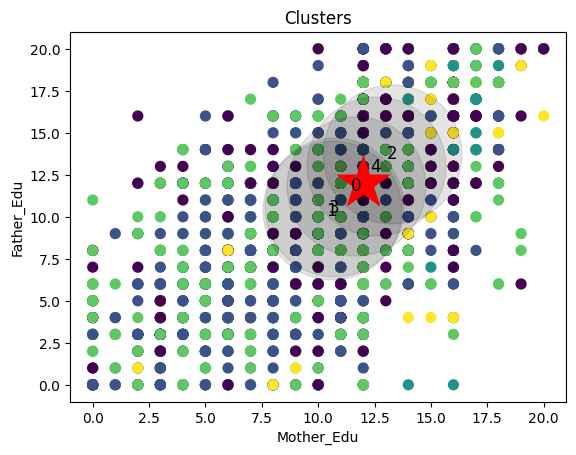

In [ ]:
#PRONÓSTICO CON MOTHER_EDU Y FATHER_EDU
#Analizar nueva persona según las características
XDN=np.array([18,12,12,5,28,71,180,48000])
ydn=mkm.predict(XDN.reshape(1,-1))
print("La persona pertenece al cluster:", ydn)
print("El porcentaje de Apr es:", NAprp[ydn])
print("El porcentaje de Neg es:", Nnegp[ydn])

#Graficar a la persona
plt.figure()
plt.scatter(XD.iloc[:,1], XD.iloc[:,2], c=ydc, s=50, cmap="viridis")
plt.scatter(centroids[:,1], centroids[:,2], c="black", s=10000, alpha=0.1) #alpha es para la transparencia del color
plt.scatter(XDN[1], XDN[2],marker="*", s=1500, facecolors="red") #facecolor para el color del marker
for i, c in enumerate(centroids):
    plt.text(c[1], c[2], str(i), fontsize=12, color='black', ha='center', va='center') #Se le ponen los números de cluster a los centroids
plt.xlabel("Mother_Edu")
plt.ylabel("Father_Edu")
plt.title("Clusters")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


La persona pertenece al cluster: [0]
El porcentaje de Apr es: [[0.96367521]]
El porcentaje de Neg es: [[0.03632479]]


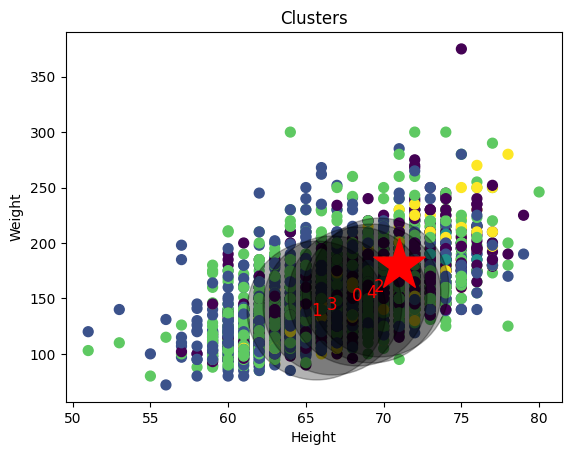

In [ ]:
#PRONÓSTICO CON HEIGHT Y WEIGHT
#Analizar nueva persona según las características
XDN=np.array([18,12,12,5,28,71,180,48000])
ydn=mkm.predict(XDN.reshape(1,-1))
print("La persona pertenece al cluster:", ydn)
print("El porcentaje de Apr es:", NAprp[ydn])
print("El porcentaje de Neg es:", Nnegp[ydn])

#Graficar a la persona
plt.figure()
plt.scatter(XD.iloc[:,5], XD.iloc[:,6], c=ydc, s=50, cmap="viridis")
plt.scatter(centroids[:,5], centroids[:,6], c="black", s=10000, alpha=0.3) #alpha es para la transparencia del color
plt.scatter(XDN[5], XDN[6],marker="*", s=1500, facecolors="red") #facecolor para el color del marker
for i, c in enumerate(centroids):
    plt.text(c[5], c[6], str(i), fontsize=12, color='red', ha='center', va='center') #Se le ponen los números de cluster a los centroids
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Clusters")
plt.show()


7. Evaluamos el desempeño del modelo

In [ ]:
#Matriz de confusión
cm=confusion_matrix(yd, ydp) #ydp de pronóstico
print(cm)

VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

#Tasa de exactitud
Ex=(VN+VP)/(VP+VN+FP+FN) #En cuanto acierta
print("La exactitud es:", Ex)

#Tasa sensibilidad
Sen=VP/(VP+FN) #Como se comportó el modelo con los positivos (aprobados)
print("La sensibilidad es:", Sen)

#Tasa especificidad
Esp=VN/(VN+FP) #Como se comportó el modelo con los negativos (negados)
print("La especificidad es:", Esp)

#Tasa de precisión
Pre=VP/(VP+FP) #Cual es el acierto clasificando los positivos
print("La precisión es:", Pre)

#Tasa de error
TE=(FP+FN)/(VP+VN+FP+FN) #En cuanto se equivoca
print("La tasa de error es:", TE)

#Tasa de precisión negativa
PredNeg=VN/(VN+FN) #Como funciona los creditos negando créditos
print("La precisión negativa es:", PredNeg)

[[   0  853]
 [   0 5110]]
La exactitud es: 0.8569511990608754
La sensibilidad es: 1.0
La especificidad es: 0.0
La precisión es: 0.8569511990608754
La tasa de error es: 0.14304880093912462
La precisión negativa es: nan


<ipython-input-15-331633d73a7d>:28: RuntimeWarning: invalid value encountered in scalar divide
  PredNeg=VN/(VN+FN) #Como funciona los creditos negando créditos


De acuerdo con los resultados arrojados por los modelos, se pudo corrobar en la plataforma colab el comportamiento del modelo naive bayes, árboles  de decisión y de clusterización de acuerdo con el archivo de excel de referencia acerca de
una Encuesta Longitudinal Nacional (NLS, por sus siglas en inglés) que sigue a más de 12 000 personas en Estados Unidos. Las preguntas de la encuesta se centran en la actividad de la fuerza laboral; la encuesta también abarca una gran variedad de temas, incluidoslos logros educativos, las inversiones en capacitación, los ingresos y los activos, las condiciones de salud, las lesiones en el lugar de trabajo, la cobertura de seguros, el abuso de alcohol y sustancias, la actividad sexual, así como los antecedentes maritales y de fertilidad.

# **Descripción de las variables**
Como se mencionó anteriormente, la base de datos presenta los resultados de una encuesta de Estados Unidos que abarca gran variedad de temas, sin embargo, para la evaluación de los modelos solo fueron tomadas ocho de las variables y una de referencia para lograr el objetivo. A continuación se describe cada una:

La primera variable a considerar es **"Age"** como su nombre lo indica, hace referencia a la edad de los encuestados, cuando se levantó la encuesta por primera vez en 1979, las edades de las personas oscilaban entre los 14 y los 21 años. **"Mother_Edu"** indica el número de años de educación de la madre, es decir, en años, cuanto ha sido el tiempo que ha estudiado, al igual que la variable **"Father_Edu"** que hace referencia a la cantidad de años de educación del padre. La variable **"FamilySize"** indica el tamaño de las familias para 1979 cuando se realizó la encuesta por primera vez, por otro lado, el **"Self_Esteem"** se refiere a la escala de autoestima de Rosenberg que mide la autoevaluación de los individuos (es decir, como se percibe cada persona individualmente). El puntaje general puede oscilar entre cero y 30 puntos, donde los puntajes más altos indican una mayor autoestima. **"Height"** indica la altura en pulgadas pero se empezó a realizar a partir de 1981, al igual que **"Weight"** que indica el peso en libras de las personas encuestadas. Finalmente, **"income"** indica el ingreso de las personas para el año 2000, donde se vuelve a realizar la encuesta. Así mismo, como variable explicativa o de entrada dentro del modelo, se usó **"HealthPlan"** el cual indica si la persona encuestada está cubierta o no por un seguro o plan de atención médica en el año 2000, si el resultado es 1 indica que SÍ cuenta con plan de salud, mientras que si es un 0 se refiere a que NO cuenta con plan de salud.

# **Análisis de resultados**
Después de comprender el tipo de base de datos que estamos trabajando, podemos evaluar los modelos y resultados:

### **Modelo Naive Bayes**
Aquí se puede observar que el modelo alcanzó una exactitud cercana al 85% (83%), destacándose el comportamiento del modelo frente a la capacidad que tiene de predecir si una persona contiene un plan de salud o no (HealthPlan) lo anterior, se ve confirmado con su buena sensibilidad cercana al 100% (94,8%), indicando que el pronóstico para los positivos tiene un buen respaldo por el modelo. Sin embargo, con una precisión negativa del 29,8% y una especificidad del 13,2%, el modelo demuestra su baja capacidad predictiva frente a los encuestados que NO contienen un plan de salud. Aún con lo anterior, su buena capacidad de predecir positivos destaca las ventajas de este modelo, y su utilidad para predecir los positivos (personas con plan de salud).

En la base de datos se puede observar que las personas que NO tienen planes de salud representan un total del 14,3% (853 personas) de los datos totales, mientras que las personas con un plan de salud tienen un peso de 85,6% (5110 personas) del total de encuestados. Para realizar un análisis de la media obtenida en el modelo, tomaremos dos de las variables y explicaremos como entender dichos resultados para que se demuestre el entendimiento de los mismos:


* **Ingresos (Income):** La diferencia más significativa en las medias se observa en los ingresos. Las personas con un plan de salud tienen un ingreso promedio mucho mayor (35,289) que las personas sin un plan de salud (16,424). Esto sugiere una fuerte relación entre los ingresos y la probabilidad de tener un plan de salud. Es lógico pensar que las personas con mayores ingresos tienen más posibilidades de acceder a un plan de salud, ya sea a través de su empleador o por contratación individual (esto se verá reflejado en el árbol de decisión, donde Income se convierte en la primera variable a considerar dentro del modelo).

* **Educación de los padres (Mother_Edu y Father_Edu):** Las personas con un plan de salud también tienden a tener padres con un mayor nivel de educación (mother=11,24 y father=11,23). Esto podría indicar una correlación entre el nivel socioeconómico de la familia y el acceso a un plan de salud. Familias con mayor nivel educativo pueden tener mejores empleos y, por lo tanto, mayor acceso a planes de salud. Además, la educación puede influir en la conciencia sobre la importancia de la salud y la prevención, lo que podría llevar a una mayor probabilidad de adquirir un plan de salud.

### **Modelo árboles de decisión**
En el modelo de árboles de decisión se puede observar que el modelo alcanzó una exactitud cercana al 90% (85,7%) destacándose el comportamiento del modelo frente a la capacidad que tiene de predecir si los encuestados tienen acceso a un plan de salud (HealthPlan) con una sensibilidad del 100% que confirma su excelente capacidad predictiva para estos datos. Así mismo, se ve la buena funcionalidad del modelo con una tasa de error del 14%, respaldada por su precisión del 85% que demuestra la buena capacidad predictiva del modelo.

Por otro lado, para la realización del pronóstico se usaron unos datos previamente entregados por el docente, en el que se evaluaba únicamente a una persona con ciertas características y a partir de ahí, se definía si presenta o no un plan de salud. El árbol de decisión muestra que Income es la primera división para determinar si una persona cuenta con plan de salud (si lo consideramos de arriba hacia abajo), con un Income <= 22063,0 que se toma como primer medida para encontrar las reglas del negocio. Otras variables como "Weight", "Height", "Mother_Edu" y "Self_Esteem" también influyen en el resultado del pronóstico. La falta de divisiones directas para variables como "Age" o "FamilySize" sugiere que el modelo no las considera relevantes. Una razón que explica por qué el modelo predijo que la persona evaluada cuenta con plan de salud es dado su especificidad del 3% indicando que el modelo no es tan bueno pronosticando aquellos encuestados sin plan de salud, una posible respuesta es por un sesgo en su entrenamiento. En la base de datos presentada, la mayoría de los encuestados cuentan con un plan de salud (más del 85%), lo que podría hacer que el modelo "aprendiera" que la mayoría de las personas tienen un plan de salud y por tanto, repitiera ese patrón en la predicción.

###**Modelo de clusterización KMeans**
En el modelo de clusterización KMeans se puede observar que el modelo alcanzó una exactitud cercana al 90% (85,69%) indicando la buena capacidad que tiene el modelo para predecir a aquellas personas que cuentan con un plan de salud, confirmado con la sensibilidad del 100%, indicando que las predicciones para los positivos (personas con plan de salud) son 100% acertadas por este modelo. La capacidad del modelo se pone en duda dada su especificidad del 0% y una precisión negativa que no aplica, lo que hace notar su baja o nula capacidad para predecir aquellas personas que no cuentan con un plan de salud.

El modelo mostró las variables con mayor correlación entre ellas, para este caso, fueron Mother_Edu y Father_Edu las dos variables que presentan un mayor puntaje, estableciendo un 65% de correlación que es compartido con las variables "Weight" y "Height" que presentan el mismo porcentaje (65%), ambas muy por encima de las correlaciones de las demás variables. Mientras que, la mayor correlación con la variable explicativa (HealthPlan) la tiene la variable Income con un 19%, que indica que esta variable es la más relevante frente al pronóstico de plan de salud o no de los encuestados.

Así mismo, se tomaron un total de 5 clusters, en relación con las variables evaluadas, el cluster 2 es el que presentó una mayor edad (18,63 años) al igual que mayores ingreso (216200,0) en comparación con los demás clusters, mientras que fue el cluster 3 el que presentó los menores valores para years (18,340 años) en comparación con los demás. Es el cluster 2 el que presenta mayores valores para Mother_Edu y Father_Edu (13,25 y 13,75 respectivamente). En cuanto a la cantidad de datos presentados, el cluster 3 es el que almacena mayor cantidad de encuestados (2276), lo contrario ocurre con el cluster 2 que presenta la menor cantidad de datos (117). Ahora bien, con un 97% de aprobación (planes de salud), el cluster 4 es el que presenta los mayores porcentajes para esta categoría, comparado con un 25% del cluster 1 que lo posiciona como el cluster con mayores niveles de negación (no planes de salud). Para finalizar, para la realización del pronóstico se uso unos datos diferentes para un solo encuestado adicional, el cliente se clasifica como parte del cluster 0 con un 96% de probabilidades de que tenga un plan de salud.

###**Conclusión**
Tras evaluar los tres modelos, se concluye que el árbol de decisión es el mejor modelo para predecir si una persona tiene un plan de salud. Esta decisión se basa en varios factores clave que hacen que este modelo supere a Naive Bayes y K-Means en términos de precisión, sensibilidad y capacidad interpretativa. Primero, su exactitud del 85,7% lo posiciona como el modelo con mejor rendimiento general, asegurando que la mayoría de sus predicciones sean correctas. Además, su sensibilidad del 100% significa que todas las personas con un plan de salud fueron correctamente identificadas, lo que es crucial cuando el objetivo es comprender los factores que influyen en la cobertura de salud. En contraste, aunque Naive Bayes también tiene una sensibilidad alta (94,8%), su baja especificidad y precisión negativa lo hacen menos confiable para detectar correctamente a quienes no cuentan con un plan de salud. K-Means, por su parte, logra identificar correctamente a quienes sí tienen cobertura, pero su especificidad del 0% lo hace ineficaz en la diferenciación de aquellos que no la tienen, lo que reduce su utilidad en escenarios donde es fundamental analizar ambos grupos.

Otro aspecto determinante en la elección del árbol de decisión es su capacidad para identificar las variables más relevantes en la predicción. Este modelo mostró que Income es la variable más influyente, estableciendo un umbral de 22,063 como un punto clave para diferenciar entre quienes tienen y no tienen un plan de salud. Además, incluyó otras variables significativas como Weight, Height, Mother_Edu y Self_Esteem, lo que demuestra que, más allá del ingreso, existen otros factores que contribuyen a la probabilidad de contar con cobertura. En cambio, Naive Bayes no permite visualizar directamente la importancia de las variables en la clasificación, y K-Means, aunque identificó correlaciones, no ofrece la misma claridad en la relación entre las variables y la variable de referencia.

Desde una perspectiva práctica, el árbol de decisión no solo predice con alta exactitud, sino que también permite una interpretación sencilla de los resultados, facilitando la toma de decisiones basada en los factores que realmente influyen en la posesión de un plan de salud. Sin embargo, es importante considerar que este modelo podría estar afectado por el sesgo en la base de datos, donde más del 85% de las personas tienen un plan de salud.